<a href="https://colab.research.google.com/github/mayurraj9378/Data-Science/blob/main/Machine_Learning_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
#supervised ML --> Regression -->Simple linear regreassion
#import all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [87]:
#Stage 1 : Data gathering /Load a Dataset
data = pd.read_csv('https://raw.githubusercontent.com/yash240990/Python/master/Grade_Set_1.csv')
data

,Hours_Studied,Test_Grade,Status,Result
0,2,57,fail,D
1,3,66,fail,D
2,4,73,pass,C
3,5,76,pass,C
4,6,79,pass,C
5,7,81,pass,B
6,8,90,pass,B
7,9,96,pass,A
8,10,100,pass,A


In [88]:
#Stage 2 : EDA
data.shape


(9, 4)

In [89]:
data.columns

Index(['Hours_Studied', 'Test_Grade', 'Status', 'Result'], dtype='object')

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Hours_Studied  9 non-null      int64 
 1   Test_Grade     9 non-null      int64 
 2   Status         9 non-null      object
 3   Result         9 non-null      object
dtypes: int64(2), object(2)
memory usage: 420.0+ bytes


In [91]:
#Stage 3 : Data Prepration
# a.) check for missing and duplicate values
# b.) Convert non numerical features into numerical features
# c.) normalization
# d.) select dependent and independent var

In [92]:
# a.) check for missing and duplicate values
data.isnull().sum()

,0
Hours_Studied,0
Test_Grade,0
Status,0
Result,0


In [93]:
data.duplicated().sum()

np.int64(0)

In [94]:
# b.) Convert non numerical features into numerical features
import sklearn.preprocessing as pp
lb = pp.LabelBinarizer()


In [95]:
data.Status=lb.fit_transform(data.Status)

In [96]:
data

,Hours_Studied,Test_Grade,Status,Result
0,2,57,0,D
1,3,66,0,D
2,4,73,1,C
3,5,76,1,C
4,6,79,1,C
5,7,81,1,B
6,8,90,1,B
7,9,96,1,A
8,10,100,1,A


In [97]:
# c.) normalization
#most imp from interview perspective
#the goal of the normalization is to change the values of numeric column in dataset to a common scale [0-1]
#https://medium.com/@nt84007/normalization-in-dbms-a7a36792bf00

#Xnorm = (X-Xmin)/(Xmax-Xmin)
#Xnorm=57-57/100-57
#Xnorm
#this is known as min max normalization


vals = data.Test_Grade.values
print(vals)

# nrmlz_val1=pp.normalize([vals])
# print(nrmlz_val1)

# nrmlz_val2=pp.MinMaxScaler(vals)
# nrmlz_val2=pp.MinMaxScaler().fit_transform([vals])
# print(nrmlz_val2)



[ 57  66  73  76  79  81  90  96 100]


In [98]:
# d.) select dependent and independent variable
#indendent var
x=data.Hours_Studied.values
x



array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])

In [99]:
x=x.reshape(9,1)
x.shape

(9, 1)

In [100]:
x.shape

(9, 1)

In [101]:
#dependent variable
y=data.Test_Grade.values
y

array([ 57,  66,  73,  76,  79,  81,  90,  96, 100])

In [102]:
#Stage 4 : Build A Predictive Model
#Apply a suitable ML algo dataset


#Supervised ML algo -->Simple linear regression
import sklearn.linear_model as lm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
lin_reg=lm.LinearRegression()


In [103]:
lin_reg.fit(x,y)



LinearRegression()

In [104]:
#Stage 5 : Evaluate Model
data['predictedValues']=lin_reg.predict(x)

In [105]:
data[['Hours_Studied','Test_Grade','predictedValues']]

,Hours_Studied,Test_Grade,predictedValues
0,2,57,59.711111
1,3,66,64.727778
2,4,73,69.744444
3,5,76,74.761111
4,6,79,79.777778
5,7,81,84.794444
6,8,90,89.811111
7,9,96,94.827778
8,10,100,99.844444


In [106]:
pred_values=lin_reg.predict(x)
print(pred_values)

[59.71111111 64.72777778 69.74444444 74.76111111 79.77777778 84.79444444
 89.81111111 94.82777778 99.84444444]


In [107]:
 #r2 score -->regression score function tells the how much ur prediction is accurate -->regreassion score function
 from sklearn.metrics import r2_score
 accuracy=r2_score(y,pred_values)
 print('regression score function :',accuracy)
 print(f'Accuracy of the model :(int (accuracy*100))%')

regression score function : 0.9757431074095347
Accuracy of the model :(int (accuracy*100))%


above 80 percent good fit model


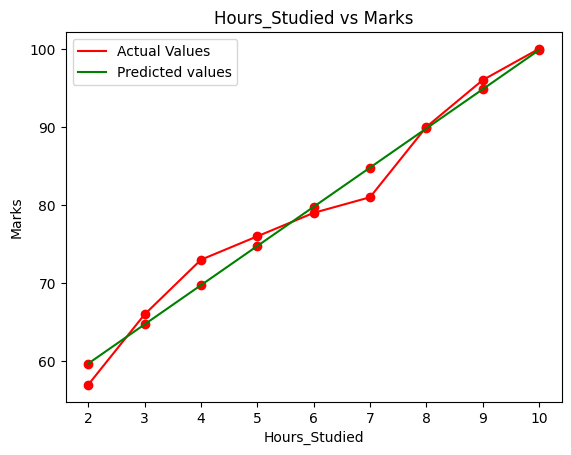

In [108]:
#plot actual values
plt.plot(x,y,color='red',label='Actual Values')
plt.scatter(x,y,color='red')
#plot predicted values
plt.plot(x,pred_values,color='green',label='Predicted values')
plt.scatter(x,pred_values,color='red')
plt.title('Hours_Studied vs Marks')
plt.xlabel('Hours_Studied')
plt.ylabel('Marks')


plt.legend()
plt.show()

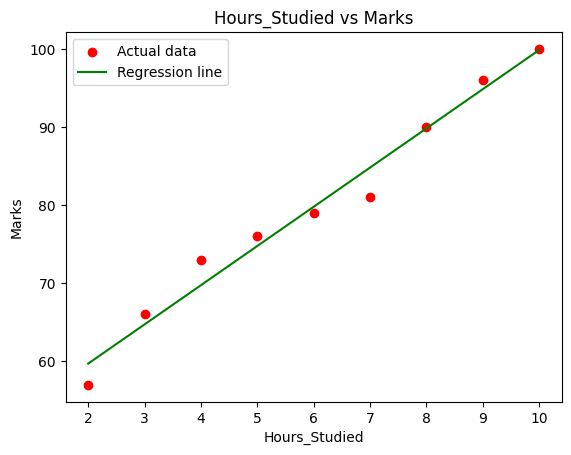

In [109]:
#plot actual values

plt.scatter(x,y,color='red',label='Actual data')
#plot predicted values
plt.plot(x,pred_values,color='green',label='Regression line')

plt.title('Hours_Studied vs Marks')
plt.xlabel('Hours_Studied')
plt.ylabel('Marks')


plt.legend()
plt.show()

In [120]:
# Stage 6: Final Prediction
hrs = float(input('Enter the number of hours studied: '))

# Adding validation for unrealistic or invalid inputs
if hrs < 0 or hrs > 24:
    print("Please enter a valid number of hours (between 0 and 24)!")
else:
    marks = lin_reg.predict([[hrs]])  # Predicting marks
    print('You can score', int(marks[0]), 'Marks')

Enter the number of hours studied: 25
Please enter a valid number of hours (between 0 and 24)!
